In [ ]:
import numpy as np # Работа с массивами данных
import pandas as pd # Работа с табличными данными
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop # Оптимизаторы
from tensorflow.keras.preprocessing.text import Tokenizer # Токенизатор для преобразование текстов в последовательности
from sklearn.preprocessing import StandardScaler # Масштабирование данных
import gdown # Загрузка датасетов из облака google
import re # Регулярные выражения
import matplotlib.pyplot as plt # Отрисовка графиков
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
%matplotlib inline
import time

!pip install -U scikit-learn>=0.22
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, precision_recall_curve
from tensorflow.keras.callbacks import ModelCheckpoint,Callback,BackupAndRestore


import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder                       # Импортируем модуль preprocessing в котором хранится LabelEncoder
label_encoder = preprocessing.LabelEncoder() 

from datetime import datetime

In [ ]:
# Подключить Google диск
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
       

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/OneGA/t1_20220101_20220726_rg_201589066.csv', index_col=0)
len(df_1)

# Создаем копию датасета
data_backup = df_1.copy()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Удаляем из ip адреса все, кроме числовых значений
df_1['ym:s:ipAddress'] = df_1['ym:s:ipAddress'].str.replace(r'\D+', '')
# Приведем ip адреса к целочисленным значениям
df_1['ym:s:ipAddress'] = df_1['ym:s:ipAddress'].astype(int)

# Изменим тип столбца с uint64 на int64
df_1['ym:s:clientID'] = df_1['ym:s:clientID'].astype(int)

# Заполняем NaN значения в столбце средними значениями по столбцу
df_1['ym:s:lastDirectClickOrder'] = df_1['ym:s:lastDirectClickOrder'].fillna(df_1['ym:s:lastDirectClickOrder'].mean())
# Приведем значения столбца к типу float
df_1['ym:s:lastDirectClickOrder'] = df_1['ym:s:lastDirectClickOrder'].astype(float)
df_1['ym:s:visitID'] = df_1['ym:s:visitID'].astype(float)

# обработка столбца ym:s:offlineCallTag
df_1['ym:s:lastDirectBannerGroup'] = [0 if el==0 else 1 for el in df_1['ym:s:lastDirectBannerGroup']]

# обработка столбцов
df_1['ym:s:endURL'] = [x[7:] for x in df_1['ym:s:endURL']]
df_1['ym:s:startURL'] = [x[9:] for x in df_1['ym:s:startURL']]

# обработка столбца ym:s:offlineCallTag
df_1['ym:s:offlineCallTag'] = ['1' if '1' in el else el for el in df_1['ym:s:offlineCallTag']]
df_1['ym:s:offlineCallTag'] = ['1' if '2' in el else el for el in df_1['ym:s:offlineCallTag']]
df_1['ym:s:offlineCallTag'] = ['1' if '3' in el else el for el in df_1['ym:s:offlineCallTag']]
df_1['ym:s:offlineCallTag'] = ['1' if '4' in el else el for el in df_1['ym:s:offlineCallTag']]
df_1['ym:s:offlineCallTag'] = [1 if '1' in el else 0 for el in df_1['ym:s:offlineCallTag']]

<ipython-input-24-a070dee4619e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_1['ym:s:ipAddress'] = df_1['ym:s:ipAddress'].str.replace(r'\D+', '')


In [ ]:
# обработка столбцов
df_1['ym:s:date'] = [pd.to_datetime(x) for x in df_1['ym:s:date']]

# Заполняем NaN значения в столбце средними значениями по столбцу
df_1['ym:s:screenHeight'] = df_1['ym:s:screenHeight'].fillna(df_1['ym:s:screenHeight'].mean())
df_1['ym:s:screenWidth'] = df_1['ym:s:screenWidth'].fillna(df_1['ym:s:screenWidth'].mean())

df_1['ym:s:diagonal'] = ((df_1['ym:s:screenHeight']**2+df_1['ym:s:screenWidth']**2)**0.5)
df_1['ym:s:diagonal'] = round(df_1['ym:s:diagonal'] / max(df_1['ym:s:diagonal']),2)

df_1 = df_1.drop(['ym:s:screenHeight', 'ym:s:screenWidth'], axis=1)

df_1['ym:s:lastDirectClickBanner'] = [0 if el==0 else 1 for el in df_1['ym:s:lastDirectClickBanner']]

df_1['ym:s:lastDirectClickBannerName'] = [x[26:] for x in df_1['ym:s:lastDirectClickBannerName']]
df_1['ym:s:lastDirectClickBannerName'] = [int(x) for x in df_1['ym:s:lastDirectClickBannerName']]
df_1['ym:s:lastDirectClickBannerName'] = round((df_1['ym:s:lastDirectClickBannerName'])/max(df_1['ym:s:lastDirectClickBannerName']),2)

df_1['ym:s:visitDuration'] = round((df_1['ym:s:visitDuration'])/max(df_1['ym:s:visitDuration']),2)

df_1['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['2022' if '2022' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['фили' if 'фили' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['Headliner' if 'headliner' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['застройщик' if 'застройщик' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['Не отказ' if 'не отказ' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['конкурент' if 'конкурент' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['запрос' if 'запрос' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['2021' if '2021' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['жк' if 'жк' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['центр сити' if 'центр сити' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]
df_1['ym:s:lastClickBannerGroupName'] = ['москва' if 'москв' in el else el for el in df_1['ym:s:lastClickBannerGroupName']]

df_1['ym:s:lastDirectPhraseOrCond'] = [x[23:] for x in df_1['ym:s:lastDirectPhraseOrCond']]

df_1['ym:s:goalsDateTime'] = [x.replace("[","") for x in df_1['ym:s:goalsDateTime']]
df_1['ym:s:goalsDateTime'] = [x.replace("]","") for x in df_1['ym:s:goalsDateTime']]
df_1['ym:s:goalsDateTime'] = [x[2:12] for x in df_1['ym:s:goalsDateTime']]
df_1 = df_1.drop(df_1[df_1['ym:s:goalsDateTime']==''].index) # --------------------------------------------- ????
df_1['ym:s:goalsDateTime'] = [datetime.strptime(x, '%Y-%m-%d') for x in df_1['ym:s:goalsDateTime']]

df_1['ym:s:deltaTime'] = df_1['ym:s:goalsDateTime'] - df_1['ym:s:date']
df_1['ym:s:deltaTime'] = [x.components.days for x in df_1['ym:s:deltaTime']]
df_1['ym:s:deltaTime'] = df_1['ym:s:deltaTime']/max(df_1['ym:s:deltaTime'] )

df_1 = df_1.drop(['ym:s:date', 'ym:s:goalsDateTime'], axis=1)

# отбрасываем столбцы где заполнены меньше 20 строк из 360 000, это слишком мало данных
cols_to_drop_little_amount = ['ym:s:from', 'ym:s:lastSocialNetworkProfile', 'ym:s:openstatSource', 'ym:s:impressionsProductCoupon']

# модель с учителем
df_1['Y'] = [1 if '201589066' in el else 0 for el in df_1['ym:s:goalsID']]
df_1 = df_1.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1)
df_1 = df_1.dropna(axis=1)                                              # тут не очень понятно

In [ ]:
# Переносим целевой столбец на первый столбец
y = df_1['Y'].copy()
df_1.drop('Y',  axis=1, inplace=True)
#df_1.insert(len(df_1.columns),'Y', y)
df_1.insert(0,'Y', y)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122948 entries, 3 to 361914
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Y                                122948 non-null  int64  
 1   Unnamed: 0.1                     122948 non-null  int64  
 2   ym:s:bounce                      122948 non-null  int64  
 3   ym:s:cookieEnabled               122948 non-null  int64  
 4   ym:s:deviceCategory              122948 non-null  int64  
 5   ym:s:endURL                      122948 non-null  object 
 6   ym:s:goalsPrice                  122948 non-null  object 
 7   ym:s:goalsSerialNumber           122948 non-null  object 
 8   ym:s:hasGCLID                    122948 non-null  int64  
 9   ym:s:impressionsProductCoupon    122948 non-null  object 
 10  ym:s:ipAddress                   122948 non-null  int64  
 11  ym:s:isNewUser                   122948 non-null  int64  
 12  ym

In [ ]:
# Превратим заголовки столбцов в список:
column_headers = list(df_1.columns.values)
df_1[column_headers].replace(pd.NA,'empty') # Заменяем пустые значения на строку 'empty'
print(column_headers)

In [ ]:
list_len = len(column_headers)
cols_list = list(range(0, list_len, 1))

for cols123 in cols_list:
  a123 = column_headers[cols123]
  df_1[a123]= label_encoder.fit_transform(df_1[a123])
 # print(cols123)
 # print(a123)

# Продолжение

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122948 entries, 3 to 361914
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Y                                122948 non-null  int64
 1   Unnamed: 0.1                     122948 non-null  int64
 2   ym:s:bounce                      122948 non-null  int64
 3   ym:s:cookieEnabled               122948 non-null  int64
 4   ym:s:deviceCategory              122948 non-null  int64
 5   ym:s:endURL                      122948 non-null  int64
 6   ym:s:goalsPrice                  122948 non-null  int64
 7   ym:s:goalsSerialNumber           122948 non-null  int64
 8   ym:s:hasGCLID                    122948 non-null  int64
 9   ym:s:impressionsProductCoupon    122948 non-null  int64
 10  ym:s:ipAddress                   122948 non-null  int64
 11  ym:s:isNewUser                   122948 non-null  int64
 12  ym:s:javascriptEnabled        

In [ ]:
# Назначаем X и y
X = df_1.iloc[:,1:]
y = df_1.iloc[:,0]
print(X.shape,y.shape)
X.info()
print(y)

(122948, 34) (122948,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 122948 entries, 3 to 361914
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Unnamed: 0.1                     122948 non-null  int64
 1   ym:s:bounce                      122948 non-null  int64
 2   ym:s:cookieEnabled               122948 non-null  int64
 3   ym:s:deviceCategory              122948 non-null  int64
 4   ym:s:endURL                      122948 non-null  int64
 5   ym:s:goalsPrice                  122948 non-null  int64
 6   ym:s:goalsSerialNumber           122948 non-null  int64
 7   ym:s:hasGCLID                    122948 non-null  int64
 8   ym:s:impressionsProductCoupon    122948 non-null  int64
 9   ym:s:ipAddress                   122948 non-null  int64
 10  ym:s:isNewUser                   122948 non-null  int64
 11  ym:s:javascriptEnabled           122948 non-null  int64
 12  ym:s:la

In [ ]:
y.value_counts()

0    121641
1      1307
Name: Y, dtype: int64

In [ ]:
df_1['Y'].value_counts()

0    121641
1      1307
Name: Y, dtype: int64

# Select Bestfeatures

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                              Specs          Score
6            ym:s:goalsSerialNumber  663668.207172
31                    ym:s:watchIDs  260936.863044
9                    ym:s:ipAddress  149534.197685
4                       ym:s:endURL  136599.857227
24              ym:s:offlineCallTag   45510.672533
29                    ym:s:startURL   14956.465788
23           ym:s:offlineCallMissed   13119.634986
22     ym:s:offlineCallHoldDuration    7240.275228
0                      Unnamed: 0.1    6989.181981
19      ym:s:lastDirectPhraseOrCond    6379.511334
25     ym:s:offlineCallTalkDuration    6053.548998
26              ym:s:offlineCallURL    3822.168481
13    ym:s:lastClickBannerGroupName    1889.946260
33                   ym:s:deltaTime    1776.477435
17        ym:s:lastDirectClickOrder     705.263268
30               ym:s:visitDuration     662.474156
21  ym:s:offlineCallFirstTimeCaller     630.570935
5                   ym:s:goalsPrice     628.896953
18    ym:s:lastDirectClickOrder

[6.88013166e-03 4.97907974e-03 1.03033344e-06 4.30745493e-03
 6.93374854e-03 7.45473255e-02 1.76342932e-01 1.78375141e-03
 0.00000000e+00 7.12491290e-03 4.48023951e-03 0.00000000e+00
 4.48567415e-03 3.30460435e-03 1.59324425e-03 1.98419992e-03
 3.48483789e-03 3.42162370e-03 3.20794250e-03 2.58775783e-03
 5.41862172e-03 9.88573417e-02 7.53583312e-02 8.48703985e-02
 2.23067214e-01 9.31616472e-02 6.95064728e-02 7.16050060e-03
 3.43909688e-03 4.70086453e-03 5.14773126e-03 8.46392710e-03
 6.78302574e-03 2.61433578e-03]


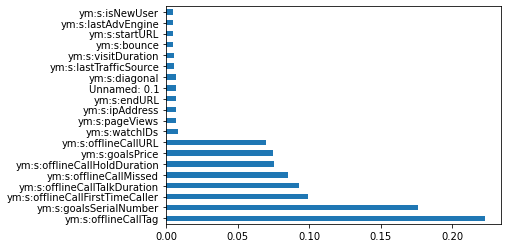

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

In [ ]:
x_train = X
y_train = y

In [ ]:
top_20_features = feat_importances.nlargest(20).index.tolist()
print(top_20_features)

x_train = x_train.drop(columns=[col for col in x_train.columns if col not in top_20_features])
x_train.info()

['ym:s:offlineCallTag', 'ym:s:goalsSerialNumber', 'ym:s:offlineCallFirstTimeCaller', 'ym:s:offlineCallTalkDuration', 'ym:s:offlineCallMissed', 'ym:s:offlineCallHoldDuration', 'ym:s:goalsPrice', 'ym:s:offlineCallURL', 'ym:s:watchIDs', 'ym:s:pageViews', 'ym:s:ipAddress', 'ym:s:endURL', 'Unnamed: 0.1', 'ym:s:diagonal', 'ym:s:lastTrafficSource', 'ym:s:visitDuration', 'ym:s:bounce', 'ym:s:startURL', 'ym:s:lastAdvEngine', 'ym:s:isNewUser']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 122948 entries, 3 to 361914
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Unnamed: 0.1                     122948 non-null  int64
 1   ym:s:bounce                      122948 non-null  int64
 2   ym:s:endURL                      122948 non-null  int64
 3   ym:s:goalsPrice                  122948 non-null  int64
 4   ym:s:goalsSerialNumber           122948 non-null  int64
 5   ym:s:ipAddress     

# Таблица корреляции

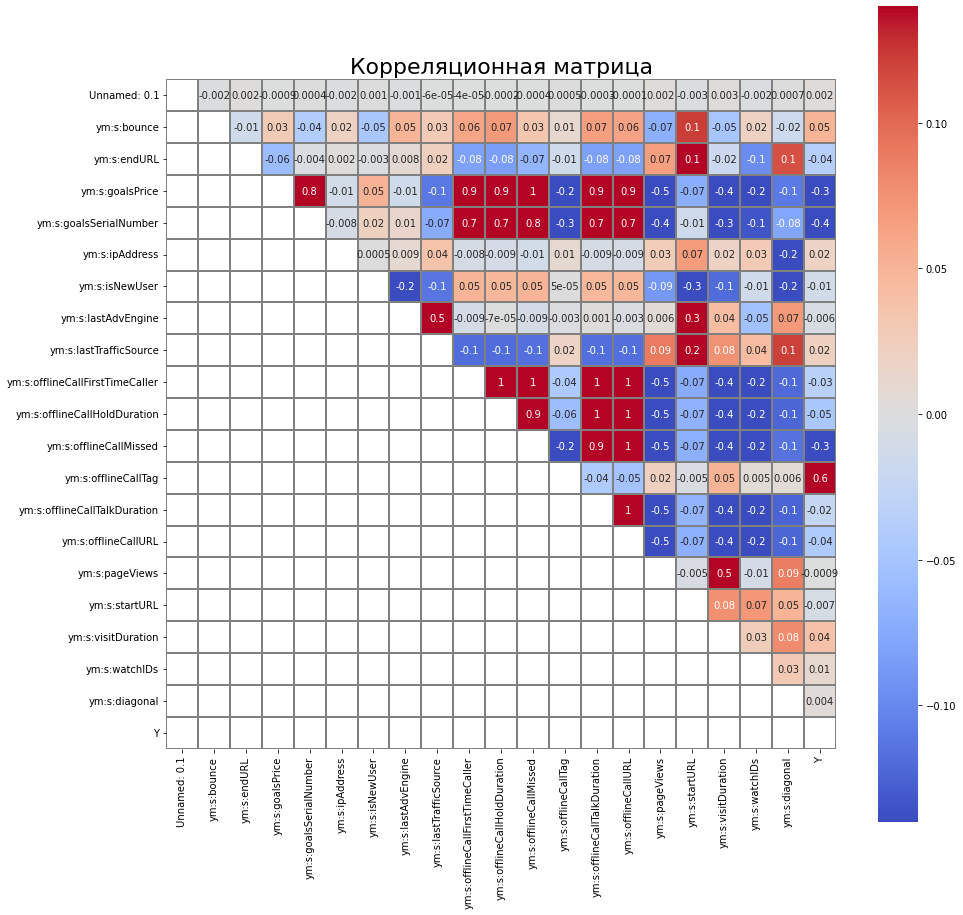

In [ ]:
# Таблица корреляции признаков
import seaborn as sb  

#get correlations of each features in dataset
X_and_y = pd.concat([x_train, y_train], axis=1)

mask_1 = np.tril(X_and_y.corr())
plt.figure(figsize=(15,15))
sb.heatmap(X_and_y.corr(), cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=22)
plt.show()

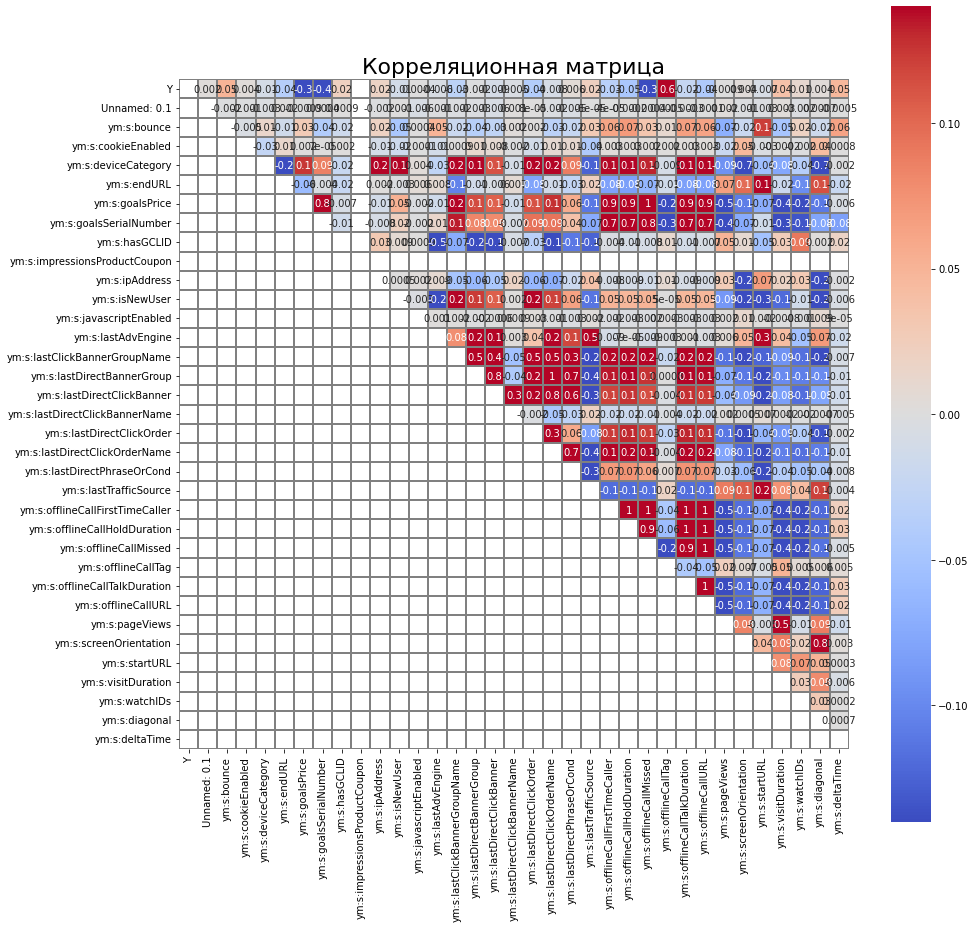

In [ ]:
mask_1 = np.tril(df_1.corr())
plt.figure(figsize=(15,15))
sb.heatmap(df_1.corr(), cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=22)
plt.show()

In [ ]:
y = df_1.iloc[:,5].astype(str).apply(str)    #target column
column_y = df_1.columns[5]
print(column_y)
print(y)
y = y.str.contains('201589066').map({True: 1, False: 0}) # map each value in the column to 0 or 1
print(y.unique())

ym:s:goalsID
3                              [45605569]
7           [45605569,152446093,45085622]
15                             [45605569]
17                             [45605569]
19                             [45605569]
                       ...               
361894                         [45605569]
361895                         [45605569]
361908    [249595028,249595129,249595330]
361912                         [45605569]
361914                         [45605569]
Name: ym:s:goalsID, Length: 122948, dtype: object


In [ ]:
# Назначаем X и y
X = df_1.iloc[:,1:]
y = df_1.iloc[:,0]
print(X.shape,y.shape)
X.info()
print(y)
y.value_counts()

(122948, 34) (122948,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 122948 entries, 3 to 361914
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Unnamed: 0.1                     122948 non-null  int64
 1   ym:s:bounce                      122948 non-null  int64
 2   ym:s:cookieEnabled               122948 non-null  int64
 3   ym:s:deviceCategory              122948 non-null  int64
 4   ym:s:endURL                      122948 non-null  int64
 5   ym:s:goalsPrice                  122948 non-null  int64
 6   ym:s:goalsSerialNumber           122948 non-null  int64
 7   ym:s:hasGCLID                    122948 non-null  int64
 8   ym:s:impressionsProductCoupon    122948 non-null  int64
 9   ym:s:ipAddress                   122948 non-null  int64
 10  ym:s:isNewUser                   122948 non-null  int64
 11  ym:s:javascriptEnabled           122948 non-null  int64
 12  ym:s:la

0    121641
1      1307
Name: Y, dtype: int64

In [ ]:
print(x_train.shape)
print(y_train.shape)

(122948, 20)
(122948,)


In [ ]:
x_train = X
y_train = y

In [ ]:
# Нормализуем данные
scaler = StandardScaler(with_mean=False)
scaler.fit(x_train)
X_scaled = scaler.transform(x_train)

In [ ]:
# Посмотрим на нормализованные данные
print(X_scaled)

[[1.64249967e-04 0.00000000e+00 2.94420132e+01 ... 3.36357200e-01
  1.40023232e+00 0.00000000e+00]
 [2.73749944e-04 0.00000000e+00 2.94420132e+01 ... 5.15636884e-01
  3.73395286e+00 0.00000000e+00]
 [6.02249877e-04 0.00000000e+00 2.94420132e+01 ... 2.11467192e+00
  1.63360437e+00 0.00000000e+00]
 ...
 [3.37134006e+00 0.00000000e+00 2.94420132e+01 ... 2.47252690e+00
  1.05017424e+00 0.00000000e+00]
 [3.37155906e+00 0.00000000e+00 2.94420132e+01 ... 3.06511064e+00
  2.56709259e+00 0.00000000e+00]
 [3.37166856e+00 0.00000000e+00 2.94420132e+01 ... 9.44381022e-01
  1.51691835e+00 0.00000000e+00]]


# Создание Модели

In [ ]:
# Разделение данных на выборки
from sklearn.model_selection import train_test_split    

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_train, shuffle=True, test_size=0.2, random_state=42)
print('Размер x_train:',x_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (98358, 34)
Размер y_train: (98358,)
Размер x_test: (24590, 34)
Размер y_test: (24590,)


In [ ]:
CLASS_COUNT=2
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

print('Размер y_train:',y_train.shape)
print('Размер y_test:',y_test.shape)

Размер y_train: (98358, 2)
Размер y_test: (24590, 2)


# Модель 1

In [ ]:
number_of_cols = x_train.shape[1]

#Создание Модели
model_1 = Sequential()                                            # Создание последовательной модели нейросети
model_1.add(Dense(1000, input_dim=number_of_cols, activation="relu"))  # Первый полносвязный слой
model_1.add(Dense(200, activation="relu"))
model_1.add(Dropout(0.1))
model_1.add(Dense(200, activation="relu"))
model_1.add(Dense(2, activation='sigmoid'))             # Выходной полносвязный слой

model_1.compile(optimizer='adam',                                 # Компиляция модели для обучения на данных вида Bag of Words
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Epoch 1/5
3074/3074 [==============================] - 34s 11ms/step - loss: 0.0429 - accuracy: 0.9928 - val_loss: 0.0098 - val_accuracy: 0.9964
Epoch 2/5
3074/3074 [==============================] - 30s 10ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.0091 - val_accuracy: 0.9966
Epoch 3/5
3074/3074 [==============================] - 30s 10ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0321 - val_accuracy: 0.9925
Epoch 4/5
3074/3074 [==============================] - 30s 10ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0090 - val_accuracy: 0.9967
Epoch 5/5
3074/3074 [==============================] - 30s 10ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0084 - val_accuracy: 0.9967
Время обучения:  203.55108642578125
Total time taken: 203.55108642578125 seconds
0.996705949306488


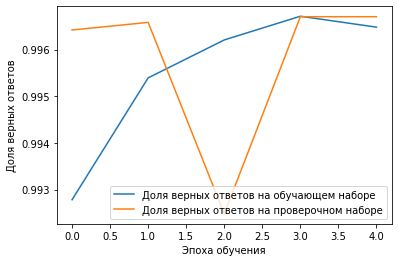

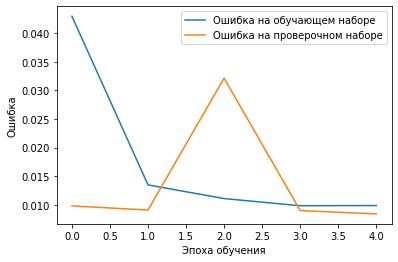

In [ ]:
import time
start_time = time.time() # счетчик времени
# Обучение сети с помощью функции fit()
history_1 = model_1.fit(x_train,                            # Обучающая выборка Bag of Words
                        y_train,                               # Метки классов обучающей выборки
                        epochs=5,                             # Количество эпох
                        batch_size=32,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_test, y_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history_1.history['val_accuracy'])) # print the highest accuracy achieved by the model


plt.plot(history_1.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_1.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history_1.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
# Проверка результата на тестовой выборке
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Точность на проверочном наборе: {:0.2f}%'.format(score[1]*100))

Точность на проверочном наборе: 99.67%


In [ ]:
print(y_test.shape)

(24590,)


In [ ]:
print(x_test.shape)

(24590, 34)


In [ ]:
print(y_test.shape)
scaler = StandardScaler()
scaler.fit(x_test)
print(x_test.shape)

(24590,)
(24590, 34)


In [ ]:
x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

x_test_transform = scaler.transform(x_test_np)
print(x_test_transform.shape)

(24590, 34)


In [ ]:

y_pred_1 = model_1.predict(x_test_transform)
y_pred_1 = np.argmax(y_pred_1, axis=1)


769/769 [==============================] - 2s 3ms/step


In [ ]:
print(y_pred_1.shape)

(24590,)


In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred_1))
accuracy_score(y_test,y_pred_1)

AxisError: ignored

In [ ]:

y_pred_1 = model_1.predict(x_test_transform)
y_pred_1 = np.argmax(y_pred_1, axis=1)


769/769 [==============================] - 2s 3ms/step


              precision    recall  f1-score   support

           0       1.00      0.67      0.80     24348
           1       0.03      1.00      0.06       242

    accuracy                           0.67     24590
   macro avg       0.51      0.84      0.43     24590
weighted avg       0.99      0.67      0.80     24590

precision score:  0.0293013682043831
recall score:  1.0


<AxesSubplot:>

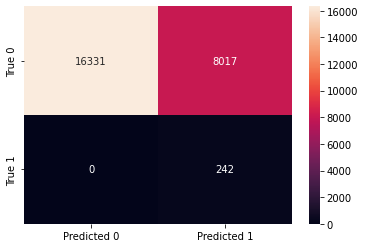

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,precision_recall_curve, ConfusionMatrixDisplay
import seaborn as sns

confusion_matrix(y_test,y_pred_1)
# plot_confusion_matrix(model_1,x_test,y_test)#, normalize='all')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_1)) #, normalize='all')
print(classification_report(y_test,y_pred_1))
print('precision score: ', precision_score(y_test,y_pred_1))
print('recall score: ', recall_score(y_test,y_pred_1))

#plot_confusion_matrix(model,X_test,y_test)#, normalize='all')
sns.heatmap(confusion_matrix(y_test, y_pred_1), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d')

# Модель 2

(122948, 35) (122948,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12181
           1       1.00      1.00      1.00       114

    accuracy                           1.00     12295
   macro avg       1.00      1.00      1.00     12295
weighted avg       1.00      1.00      1.00     12295

precision score:  1.0
recall score:  1.0


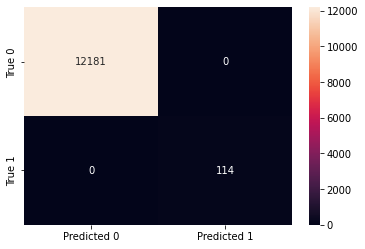

In [ ]:
# взято у Ekaterina Treskova но с использованием предобработки только Label_Encoder
#cols = ['ym:s:offlineCallTalkDuration', 'ym:s:offlineCallTag','ym:s:bounce','ym:s:deltaTime','ym:s:visitDuration','ym:s:endURL','ym:s:lastClickBannerGroupName','ym:s:offlineCallFirstTimeCaller']
column_headers_end = list(df_1.columns.values)
X_2 = df_1[column_headers_end]
#y = df_1['Y']
y_2 = y
print(X_2.shape,y_2.shape)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_2_train = scaler.fit_transform(X_2_train)
X_2_test = scaler.transform(X_2_test)

from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_2_train,y_2_train)
y_2_pred = model_2.predict(X_2_test)

accuracy_score(y_2_test,y_2_pred)
confusion_matrix(y_2_test,y_2_pred)
# plot_confusion_matrix(model_2,X_2_test,y_2_test)#, normalize='all')
sns.heatmap(confusion_matrix(y_2_test, y_2_pred), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d')
print(classification_report(y_2_test,y_2_pred))
print('precision score: ', precision_score(y_2_test,y_2_pred))
print('recall score: ', recall_score(y_2_test,y_2_pred))

# Autokeras

In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00


In [ ]:
import autokeras as ak

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Обучение модели
# Определение EarlyStopping-коллбека
es_callback = EarlyStopping(monitor='val_loss', patience=4)
start_time = time.time()
clf = ak.ImageClassifier(overwrite=True, max_trials=5, num_classes=10, multi_label=False, loss="categorical_crossentropy", metrics=["accuracy"], 
                         project_name="my_project", directory="my_dir", seed=88, max_model_size=None, tuner='bayesian', objective ='val_accuracy')
# Обучаем 10  моделей
clf.fit(x_train, y_train, epochs=10, batch_size=64, callbacks=[es_callback])
end_time = time.time()
# Вывод времени обучения и точности модели
print("Total training time:", end_time - start_time)
print("Training accuracy:", clf.evaluate(x_train, y_train)[1])
print("Test accuracy:", clf.evaluate(x_val, y_val)[1])

TypeError: ignored

In [ ]:
# чтобы получить num_models лучших моделей:
best_models = clf.tuner.get_best_models(num_models=3)

In [ ]:
best_models[0].summary()

In [ ]:
best_models[1].summary()

In [ ]:
best_models[2].summary()

In [ ]:
# Предсказываем на основании лучшей модели на проверочной выборке
predicted_y = clf.predict(x_val)
print(predicted_y)

In [ ]:
# Оцениваем лучшую модель с использованием тестовых данных.
print(clf.evaluate(x_val, y_val))

5/5 [==============================] - 2s 97ms/step - loss: 2.0885 - accuracy: 0.3667
[2.0885496139526367, 0.36666667461395264]
